# Google Graveyard Scraping

In [5]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd


In [6]:
link = 'https://killedbygoogle.com'
responce = requests.get(link)
html = responce.text

In [7]:
soup = BeautifulSoup(html,'html')

In [139]:
df = pd.DataFrame(columns= ['Title', 'Type','Desc','Age', 'Killed', 'Started', 'Ended'])

products = soup.find_all('li')
for item in range( 1, len(products)):
    body = products[item].find('div', {'class': 'css-1nov6qy e1hf78cm0'})
    
    if type(body) == type(products[1]) :
        title = body.find('a').text
        desc = body.find('p').text
        index = desc.index('.') + 1
        age = desc[index:].strip()
        desc = desc[0:index]
        index = desc.find(',')
        killed = 'not yet'
        if index > -1:
            killed = desc[0:index]
            desc = desc[index + 1:]

        ptype = products[item].find('div',{'class':'css-1ew1k0h e1hf78cm3'})
        ptype = ptype.find('span').text
        
        date = products[item].find('div',{'class':'css-6plnry e1hf78cm1'})
        bdate = date.text
        b = ''
        d = 2024
        if bdate.find('-') > -1:
            index = bdate.index('-')
            b = bdate[0: index - 1]
            b = b.strip()
            b = int(b)
            d = bdate[index+1:]
            d = d.strip()
            d = int(d)
            age = d-b
        row = [title,ptype,desc,age, killed,b,d]
        df.loc[item - 1] = row
   

In [140]:
df.head()

,Title,Type,Desc,Age,Killed,Started,Ended
0,Google Jamboard,app,Google Jamboard was a web and native whiteboar...,It will be about 8 years old.,not yet,,2024
1,Jamboard,hardware,Jamboard was a digital 4K touchscreen whiteboa...,It will be over 7 years old.,not yet,,2024
2,Chromecast,hardware,Chromecast was a line of digital media player...,11,Killed 2 days ago,2013,2024
3,VPN by Google One,service,VPN by Google One was a virtual private netwo...,4,Killed about 2 months ago,2020,2024
4,DropCam,hardware,Dropcam was a line of Wi-Fi video streaming c...,15,Killed 4 months ago,2009,2024


# Analysis and Stats

In [102]:
import matplotlib.pyplot as plt
#import numpy as np

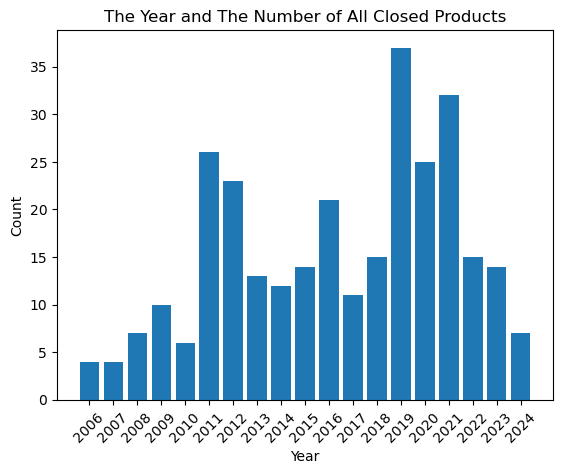

In [141]:
df = df.sort_values('Ended')
year = []
count = []
for i in range( len(df)):
    y = df.loc[i]['Ended']
    if y in year:
        index = year.index(y)
        count[index] += 1
    else:
        year.append(int(y))
        count.append(1)
    


plt.title('The Year and The Number of All Closed Products')
plt.xlabel('Year')
plt.xticks(year,year,rotation=45)
plt.ylabel('Count')
plt.bar(year,count)
plt.show()

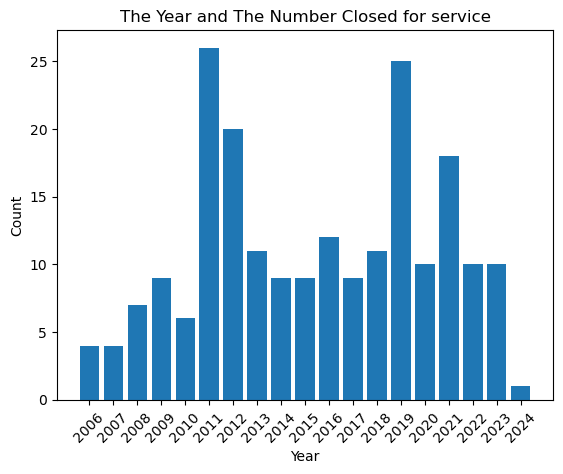

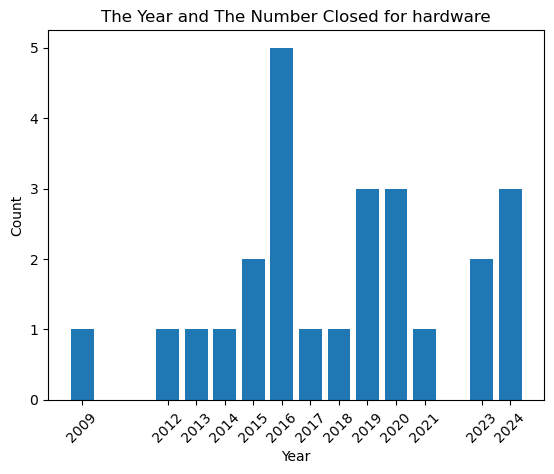

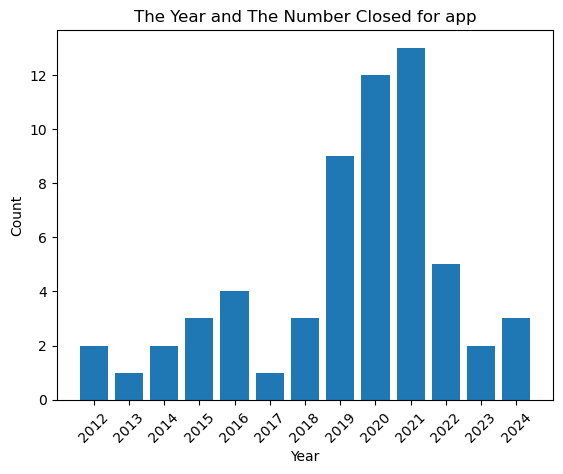

In [136]:
def bar_graph_for(df,ptype):
    df = df.sort_values('Ended')
    year = []
    count = []
    for i in range( len(df)):
        if df.loc[i]['Type'] == ptype:
            y = df.loc[i]['Ended']
            if y in year:
                index = year.index(y)
                count[index] += 1
            else:
                year.append(int(y))
                count.append(1)
        
    
    
    plt.title('The Year and The Number Closed for ' + ptype )
    plt.xlabel('Year')
    plt.xticks(year,year,rotation=45)
    plt.ylabel('Count')
    plt.bar(year,count)
    plt.show()
bar_graph_for(df,'service')
bar_graph_for(df,'hardware')
bar_graph_for(df,'app')